In [1]:
# using everglades dataset
# relevant variables: pH and biovolume
# hypothesis: Biovolume will spike at a neutral pH and decrease as pH gets too low (acidic) or too high (basic). In other words, there will be a parabolic relationship between pH and biovolume. 

Enter the file name:  epa_everglades_emap_2014_data.csv


pH - Mean: 7.25 Median: 7.26 Standard Deviation: 0.49
Biovolume - Mean: 228.02 Median: 50.0 Standard Deviation: 407.51
 


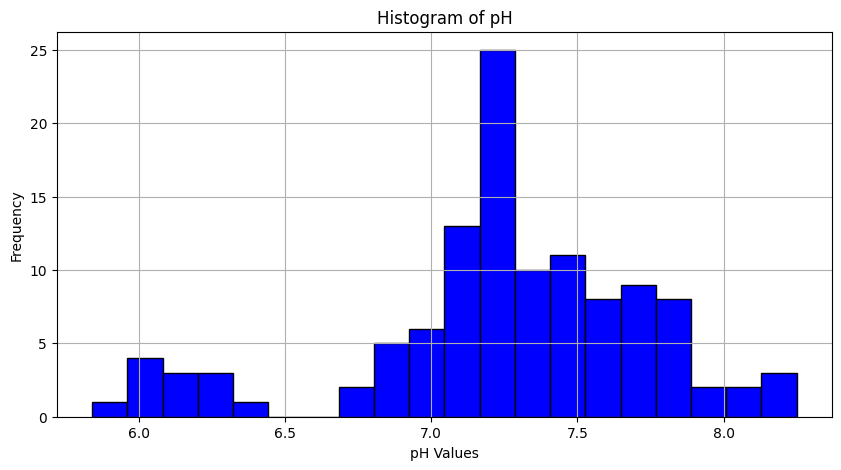

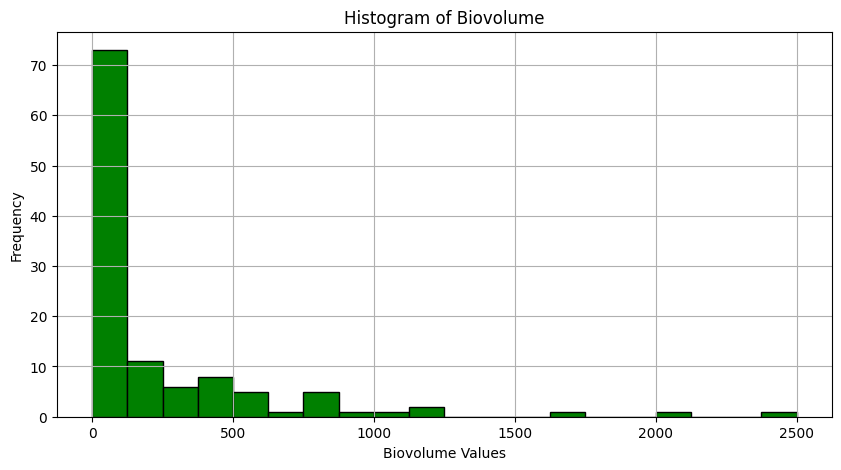

In [5]:
# DATA DESCRIPTION
# characterize mean, median, and standard deviation

import csv
import numpy as np
import matplotlib.pyplot as plt

# open file & obtain file name
file_name = input("Enter the file name: ")

# read file
file = open(file_name, 'r')
reader = csv.reader(file)
lines = list(reader)

# create empty variable lists to hold data
pH = []
biovolume = []

# loop through the lines, skipping the header (start from lines[2:])
for line in lines[2:]:  # start at index 2 to skip the header and second line
    # ensure there are enough columns (at least 66 because biovolume is column 65)
    if len(line) > 65:
        pH_value = line[29]
        biovolume_value = line[65]

        # check if pH_value can be converted to a float and biovolume_value is a valid integer
        if pH_value.replace('.', '', 1).isdigit() and biovolume_value.isdigit():
            # if both values are valid, append them to the lists
            pH.append(float(pH_value))
            biovolume.append(int(biovolume_value))

# compute mean, median, and standard deviation
if pH and biovolume:  # as long as there are valid entries in both lists
    pH_mean = round(np.mean(pH), 2)
    pH_median = np.median(pH)
    pH_std = round(np.std(pH), 2)

    biovolume_mean = round(np.mean(biovolume), 2)
    biovolume_median = np.median(biovolume)
    biovolume_std = round(np.std(biovolume), 2)

    # print statistics
    print("pH - Mean:", pH_mean, "Median:", pH_median, "Standard Deviation:", pH_std)
    print("Biovolume - Mean:", biovolume_mean, "Median:", biovolume_median, "Standard Deviation:", biovolume_std)
    
    print(" ")
    
# create histograms for pH and biovolume

    # pH histogram
    plt.figure(figsize=(10, 5))  # set the size of the plot
    plt.hist(pH, bins=20, color='blue', edgecolor='black')  # 20 bins, blue bars w/ black edges
    plt.title('Histogram of pH')  # histogram title
    plt.xlabel('pH Values')  # x-axis label
    plt.ylabel('Frequency')  # y-axis label
    plt.grid(True)  # show gridlines
    
    # you can save images and also specify the resolution
    # plt.savefig('pH_histogram.png', dpi=300)  # save as PNG with high resolution
    plt.show()  # display the histogram
    
    # biovolume histogram
    plt.figure(figsize=(10, 5))  # set the size of the plot
    plt.hist(biovolume, bins=20, color='green', edgecolor='black')  # 20 bins, green bars w/ black edges
    plt.title('Histogram of Biovolume')  # histogram title
    plt.xlabel('Biovolume Values')  # x-axis label
    plt.ylabel('Frequency')  # y-axis label
    plt.grid(True)  # show gridlines

    # plt.savefig('biovolume_histogram.png', dpi=300) 
    plt.show() # display the histogram

Pearson correlation between pH and Biovolume: 0.335
Spearman correlation between pH and Biovolume: 0.529
 
Linear Regression values:
Slope (m): 278.11
Intercept (b): -1788.96
R-squared: 0.112
P-value: 0.000239
Standard Error: 73.3
 


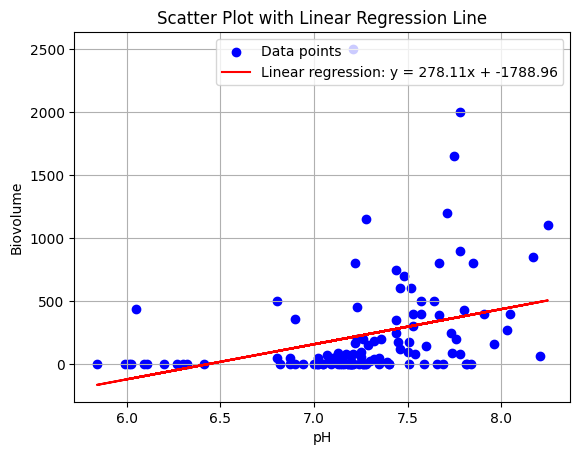

In [16]:
# CORRELATION
# find Pearson and Spearman correlation coefficients
import numpy as np
from scipy.stats import pearsonr, spearmanr, linregress  # import linregress here for linear regression
import matplotlib.pyplot as plt

# assuming pH and biovolume lists are already available from the previous block

# check if we have data for both pH and biovolume
if pH and biovolume:
    # calculate Pearson and Spearman correlation coefficients and dicard p-values
    pearson_corr, _ = pearsonr(pH, biovolume) # underscore gets rid of p-values because we only want coefficients
    spearman_corr, _ = spearmanr(pH, biovolume)

    # print results
    print("Pearson correlation between pH and Biovolume:", round(pearson_corr, 3))
    print("Spearman correlation between pH and Biovolume:", round(spearman_corr, 3))
    
print(" ")

# conduct linear regression
LR = linregress(pH, biovolume) # linear regression for two variables
print("Linear Regression values:") # to avoid clutter, we can print all of the values provided by LR individually
print("Slope (m):", round(LR.slope, 2))
print("Intercept (b):", round(LR.intercept, 2))
print("R-squared:", round(LR.rvalue**2, 3))  # R-squared is the square of the correlation coefficient
print("P-value:", round(LR.pvalue, 6))
print("Standard Error:", round(LR.stderr, 2))

print(" ")

# create the scatter plot of the data points
plt.scatter(pH, biovolume, color='blue', label='Data points')

# create the linear regression line
# use the equation y = mx + b, where m is the slope and b is the intercept
plt.plot(pH, LR.slope * np.array(pH) + LR.intercept, color='red', label=f'Linear regression: y = {round(LR.slope, 2)}x + {round(LR.intercept, 2)}')

# add labels and title
plt.xlabel('pH')
plt.ylabel('Biovolume')
plt.title('Scatter Plot with Linear Regression Line')

# show the legend to label the data points and regression line
plt.legend()

# display plot
plt.grid(True)

# save image
# plt.savefig('LR_scatter.png', dpi=300)  # Save as PNG with high resolution
plt.show()

Explained variance ratio (in %): [9.9999871e+01 1.2900000e-04]
Principal components (Eigenvectors): 
 [[ 4.03132064e-04  9.99999919e-01]
 [-9.99999919e-01  4.03132064e-04]]
Transformed data: 
 [[-1.63016842e+02 -1.02321740e+00]
 [-2.28017119e+02 -3.49421040e-01]
 [ 3.71982836e+02 -1.17541801e-01]
 [-2.28017244e+02 -3.94210654e-02]
 [ 1.42198284e+03  7.57468846e-02]
 [ 6.21983078e+02 -6.66758732e-01]
 [ 2.19829493e+01 -4.68638006e-01]
 [ 9.21982695e+02  3.44180814e-01]
 [-2.28017059e+02 -4.99421028e-01]
 [ 9.71982864e+02 -6.56625474e-02]
 [ 5.71982880e+02 -1.86915376e-01]
 [-2.80172482e+01  1.12053498e-02]
 [ 2.27198256e+03  9.58409095e-01]
 [-2.28017240e+02 -4.94210646e-02]
 [-2.28017317e+02  1.40578920e-01]
 [-2.03017206e+02 -1.29342756e-01]
 [ 1.31982606e+02  4.05706453e-01]
 [-1.28017131e+02 -2.99107835e-01]
 [ 2.01982963e+02 -4.66074229e-01]
 [-2.80172361e+01 -1.87946477e-02]
 [-1.78017321e+02  1.60735523e-01]
 [-2.28016994e+02 -6.59421015e-01]
 [-2.28017325e+02  1.60578918e-01]
 [

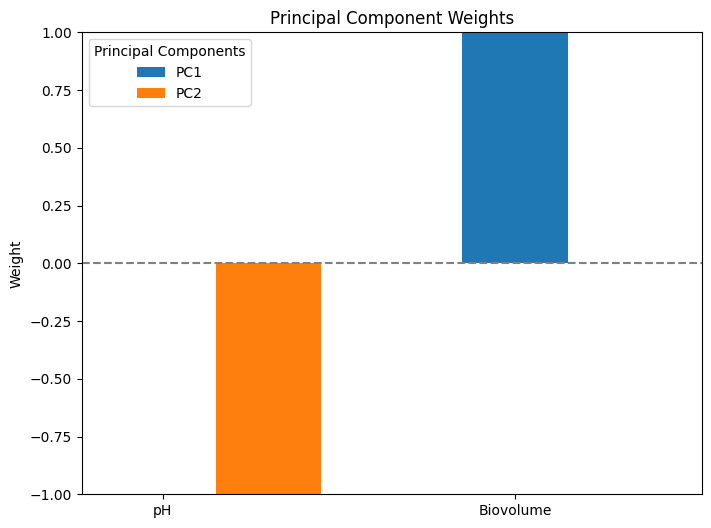

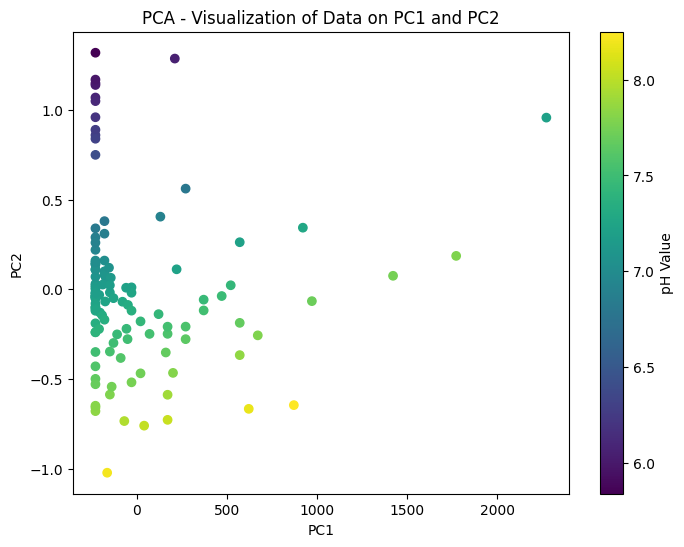

In [14]:
# DIMENSIONALITY REDUCTION
# conduct PCA

import numpy as np
from sklearn.decomposition import PCA

# pH and biovolume are the relevant variables
data = np.array([pH, biovolume]).T  # combine into 2-D array (rows = samples, columns = features)

# fit PCA and transform the data (get the principal components)
pca = PCA()
principal_components = pca.fit_transform(data)  # fits the model and also transforms the data
explained_variance_percentages = np.round(pca.explained_variance_ratio_ * 100, 6)  # convert variance ratios to percentages for convenience

# print the explained variance ratio for each principal component
print("Explained variance ratio (in %):", explained_variance_percentages)

# print the principal components (eigenvectors)
print("Principal components (Eigenvectors):", "\n", pca.components_)

# print the transformed data (original data but expressed in terms of the principal components)
print("Transformed data:", "\n", principal_components)

print(" ")

# extract PC weights and plot
# extract principal component weights
weights = pca.components_

# plot the weights as a bar chart
plt.figure(figsize=(8, 6))

# plot the weights for each principal component
for i in range(weights.shape[0]):
    plt.bar(np.arange(weights.shape[1]) + i * 0.3, weights[i], width=0.3, label=f'PC{i+1}') # plotting bars for weights, first PC1 and then PC2

# adjust the y-axis to make the bars more visible
plt.ylim(-1, 1)
    
# labeling
plt.xticks(np.arange(weights.shape[1]), ['pH', 'Biovolume'])  # label x-axis as pH and biovolume
plt.title('Principal Component Weights')
plt.ylabel('Weight')
plt.legend(title="Principal Components")

# add a horizontal line at y = 0 for reference
plt.axhline(y=0, color='gray', linestyle='--')

plt.savefig('PCA_bar.png', dpi=300)
plt.show()

print(" ")

# visualize data on PC1 and PC2
# fit PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# transformed data is now in pca_result, where: pca_result[:, 0] -> PC1, pca_result[:, 1] -> PC2

# color-code based on the pH values
category = np.array(pH) 

# create a color map for different pH values
# normalize the pH values to a range [0, 1] for color coding
norm = plt.Normalize(vmin=min(category), vmax=max(category))
cmap = plt.get_cmap('viridis')

# plot the data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=category, cmap=cmap, norm=norm)

# add color bar to show the scale of pH values
plt.colorbar(scatter, label='pH Value')

# add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Visualization of Data on PC1 and PC2')

# save and show the plot
plt.savefig('PC1_and_PC2_colorcode.png', dpi=300)
plt.show()